In [24]:
pip install seaborn

     |████████████████████████████████| 285 kB 9.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
# pip install nltk


In [1]:
import os 
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np
dir_name= os.getcwd()+'/data/'


In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples 

analyzer = SentimentIntensityAnalyzer()

In [29]:
def read_tweets_us_path(path):
    print('read_us_path')
    path=os.path.join(dir_name,'train-data/'+path)
    df=pd.read_csv(path)
    cs=[]
    for row in range(len(df)):
        cs.append(analyzer.polarity_scores(df['tweets'].iloc[row])['compound'])
    df['compound_vader_score']=cs
    print(df)
    return df

def read_news_us_path(path):
    print('read_us_path')
    path=os.path.join(dir_name,'train-data/'+path)
    df=pd.read_csv(path)
    cs=[]
    for row in range(len(df)):
        cs.append(analyzer.polarity_scores(df['news'].iloc[row])['compound'])
    df['compound_vader_score']=cs
    df = df[(df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)
    print(df)
    return df

In [31]:
def find_tweets_pred_label(grouped_data,file_name,perc_change):
    print('find_pred_label')
    tweets=grouped_data['tweets']
    grouped_data=grouped_data.groupby(['dates','ticker'])['compound_vader_score'].mean().reset_index()
    final_label=[]
    for i in range(len(grouped_data)):

        if grouped_data['compound_vader_score'].iloc[i]>perc_change:
            final_label.append(2)
        elif grouped_data['compound_vader_score'].iloc[i]<-perc_change:
            final_label.append(0)
        elif (grouped_data['compound_vader_score'].iloc[i]>=-perc_change  and grouped_data['compound_vader_score'].iloc[i]<=perc_change):
            final_label.append(1)

    grouped_data['pred_label']=final_label
    grouped_data['tweets']=tweets
    grouped_data.to_csv(file_name)
    
def find_news_pred_label(grouped_data,file_name,perc_change):
    print('find_pred_label')
    tweets=grouped_data['news']
    grouped_data=grouped_data.groupby(['dates','ticker'])['compound_vader_score'].mean().reset_index()
    final_label=[]
    for i in range(len(grouped_data)):
        if grouped_data['compound_vader_score'].iloc[i]>perc_change:
            final_label.append(2)
        elif grouped_data['compound_vader_score'].iloc[i]<-perc_change:
            final_label.append(0)
        elif (grouped_data['compound_vader_score'].iloc[i]>=-perc_change  
              and grouped_data['compound_vader_score'].iloc[i]<=perc_change):
            final_label.append(1)

    grouped_data['pred_label']=final_label
    grouped_data['news']=tweets
    grouped_data.to_csv(file_name)


In [48]:

def merge_actual_label (join_path,label_data):
    print('merge_actual_label')
    vader_data=pd.read_csv(join_path)
    vader_data.set_index(keys = ["dates","ticker"],inplace=True)
#     print(vader_data)
    label_data=pd.read_csv(label_data)
    label_data.set_index(keys = ["dates","ticker"],inplace=True)
#     print(label_data)
    merge=pd.merge(vader_data,label_data, how='inner', left_index=True, right_index=True)
    merge.drop(columns=['Unnamed: 0_y','Unnamed: 0.1'],axis=1)
    print(merge)
    return merge


In [33]:
import seaborn as sns
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,percent=True,cbar=True,xyticks=True,xyplotlabels=True,
sum_stats=True,figsize=None,cmap='Blues', title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))
        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""



    if figsize==None:

        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def validation(df):
    print(validation)
    pred_label=list(df['pred_label'])
    actual_label=list(df['label'])
    labels=[0,1,2]
    cm=confusion_matrix(actual_label, pred_label,labels)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['Negative','Zero', 'Positive']
    make_confusion_matrix(cm, group_names=labels, categories=categories, )

In [36]:
# 
def us_tweets_starter(path,file_name,label_data,percent_change):
    grouped_data=read_tweets_us_path(path)
    find_tweets_pred_label(grouped_data,file_name,percent_change)
    df=merge_actual_label (file_name,label_data)
    return df


def us_news_starter(path,file_name,label_data,percent_change):
    grouped_data=read_news_us_path(path)
    find_news_pred_label(grouped_data,file_name,percent_change)
    df=merge_actual_label (file_name,label_data)
    
    return df
 

In [63]:
# getting nasdaq tweets
# threshold=np.linspace(0.0,0.02, num=5)
# nasdaq_tweets_accuracies=[]
# for val in threshold:
#     print (val)
nasdaq_tweets_path='nasdaq/nasdaq_no_labelled_tweets.csv'
nasdaq_vader_tweets_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_vader_tweets.csv')
join_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_labelled_data.csv')
nasdaq_tweets_df=us_tweets_starter(nasdaq_tweets_path,nasdaq_vader_tweets_path,join_path,0.01)
# nasdaq_tweets_accuracies.append(find_accuracy(nasdaq_tweets_df))

read_us_path
        Unnamed: 0       dates  \
0                0  2021-01-04   
1                1  2021-01-04   
2                2  2021-01-04   
3                3  2021-01-04   
4                4  2021-01-04   
...            ...         ...   
278771          79  2021-01-07   
278772          80  2021-01-07   
278773          81  2021-01-07   
278774          82  2021-01-07   
278775          83  2021-01-07   

                                                   tweets ticker  \
0       b'RT @TradezTiger: Why Investors Like $CBBT? \...   AACG   
1       b'RT @TradezTiger: Why Investors Like $CBBT? \...   AACG   
2       b'RT @TradezTiger: Why Investors Like $CBBT? \...   AACG   
3       b'RT @TradezTiger: Why Investors Like $CBBT? \...   AACG   
4       b'RT @TradezTiger: Why Investors Like $CBBT? \...   AACG   
...                                                   ...    ...   
278771  b'RT @invest_tran: Fujitsu signs $8M contract ...   ZYXI   
278772  b'Fujitsu signs $8M contra

In [59]:

import matplotlib.pyplot as plt
def plot_accuracy(accuracies):
    x=accuracies
    y=np.linspace(0.0,0.02, num=5)
    plt.plot(y,x)
    plt.ylabel('Accuracies')
    plt.xlabel('threshold')
    
#     plt.annotate('Local Max', x =) 
    plt.show() 
    
#find_accuracy(nasdaq_tweets_df)
def find_accuracy(name):
    pred=list(name['pred_label'])
    act=list(name['label'])
    true=0
    false=0
    for i in range(len(pred)):
        if(pred[i]==act[i]):
            true+=1
        else:
            false+=1
    acc=true/len(pred)
    print(acc)
    return acc

# plot_accuracy(nasdaq_tweets_accuracies)

<function validation at 0x15198a7447b8>


/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


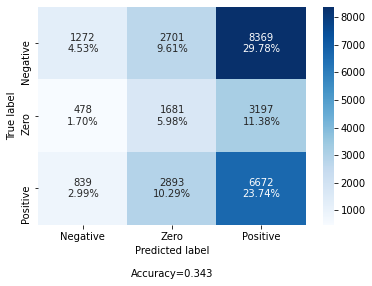

In [49]:
validation(nasdaq_tweets_df)

In [64]:
# getting nasdaq news
# threshold=np.linspace(0.0, 0.02, num=5)
# nasdaq_news_accuracies=[]
# for val in threshold:
#     print(val)
nasdaq_news_path='nasdaq/nasdaq_no_labelled_news.csv'

nasdaq_vader_news_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_vader_news.csv')
join_path=os.path.join(dir_name,'train-data/nasdaq/nasdaq_labelled_data.csv')

nasdaq_news_df=us_news_starter(nasdaq_news_path,nasdaq_vader_news_path,join_path,0.01)
# nasdaq_news_accuracies.append(find_accuracy(nasdaq_news_df))


read_us_path
       Unnamed: 0       dates  \
0               1  2020-11-12   
1               2  2020-11-05   
2               3  2020-08-12   
3               4  2020-08-05   
4               5  2020-07-09   
...           ...         ...   
110472         91  2019-08-19   
110473         92  2019-08-16   
110474         94  2019-08-05   
110475         98  2019-07-23   
110476         99  2019-07-22   

                                                     news ticker  \
0       ATA Creativity Global Reports 2020 Third Quart...   AACG   
1       ATA Creativity Global Schedules 2020 Third Qua...   AACG   
2       ATA Creativity Global Reports 2020 Second Quar...   AACG   
3       ATA Creativity Global Schedules 2020 Second Qu...   AACG   
4       ATA Creativity Global Regains Compliance with ...   AACG   
...                                                   ...    ...   
110472  Zynex Inc (ZYXI) President, CEO and Chairman T...   ZYXI   
110473      These 4 stocks have strong technic

<function validation at 0x15198a7447b8>


/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


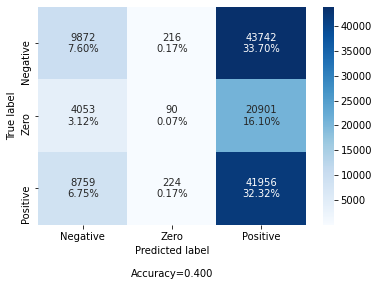

In [50]:
validation(nasdaq_news_df)

In [65]:
# getting nyse news
# threshold=np.linspace(0.0, 0.02, num=5)
# nyse_newss_accuracies=[]
# for val in threshold:
#     print(val)
nyse_news_path='nyse/nyse_no_labelled_news.csv'
nyse_vader_news_path=os.path.join(dir_name,'train-data/nyse/nyse_vader_news.csv')
join_path=os.path.join(dir_name,'train-data/nyse/nyse_labelled_data.csv')

nyse_news_df=us_news_starter(nyse_news_path,nyse_vader_news_path,join_path,0.01)
#     nyse_newss_accuracies.append(find_accuracy(nyse_news_df))

read_us_path
       Unnamed: 0       dates  \
0               1  2020-12-22   
1               2  2020-12-21   
2               3  2020-12-20   
3               5  2020-12-14   
4               7  2020-12-07   
...           ...         ...   
106542         94  2018-12-08   
106543         95  2018-11-27   
106544         96  2018-11-27   
106545         97  2018-11-14   
106546         98  2018-11-13   

                                                     news ticker  \
0       Agilent Receives Approval for GenetiSure Dx Po...      A   
1                     Is Agilent A Good Stock To Buy Now?      A   
2       Is Agilent Technologies, Inc.'s (NYSE:A) Stock...      A   
3             Agilent Receives Multiple Innovation Awards      A   
4       Agilent Presents Thought Leader Award to IIT D...      A   
...                                                   ...    ...   
106542  Zymeworks Submits Investigational New Drug (IN...   ZYME   
106543  BRIEF-Zymeworks, Beigene Announce Lice

<function validation at 0x15198a7447b8>


/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


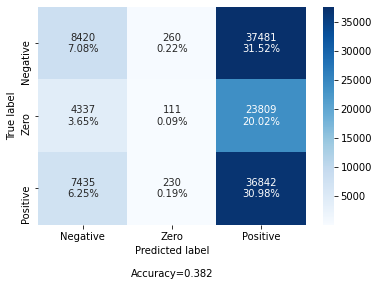

In [51]:
validation(nyse_news_df)

In [66]:
# getting nyse tweets

# threshold=np.linspace(0.0, 0.02, num=5)
# nyse_tweets_accuracies=[]
# for val in threshold:
#     print(val)
nyse_tweets_path='nyse/nyse_no_labelled_tweets.csv'
nyse_vader_tweets_path=os.path.join(dir_name,'train-data/nyse/nyse_vader_tweets.csv')
join_path=os.path.join(dir_name,'train-data/nyse/nyse_labelled_data.csv')
nyse_tweets_df=us_tweets_starter(nyse_tweets_path,nyse_vader_tweets_path,join_path,0.01)
#     nyse_tweets_accuracies.append(find_accuracy(nyse_tweets_df))


read_us_path
             dates                                             tweets ticker  \
0       2021-01-04  b'$DANG! $IT $YELP $TOO $FUN\n$HE $EFF $MS $RA...      A   
1       2021-01-04  b"RT @FinancialReview: Australian shares are s...      A   
2       2021-01-04               b'$I $FLOW $HOT\n$AT $A $BOX\n$EEP!'      A   
3       2021-01-04  b'@fr0gger_ Perl is a good addition. Sum all o...      A   
4       2021-01-04  b"RT @FinancialReview: Australian shares are s...      A   
...            ...                                                ...    ...   
225782  2021-01-08  b'$ZYME with the confirmation the street has b...   ZYME   
225783  2021-01-08  b'#Zymeworks to Present at #JPMorgan #Healthca...   ZYME   
225784  2021-01-08  b'RT @ZymeworksInc: NEWS: Management to presen...   ZYME   
225785  2021-01-08  b'Zymeworks to Present at J.P. Morgan Healthca...   ZYME   
225786  2021-01-08  b'Still liking this set up $ZYME https://t.co/...   ZYME   

               sector  com

<function validation at 0x15198a7447b8>


/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


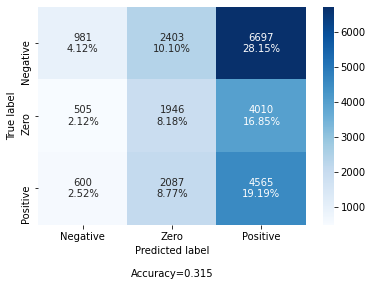

In [52]:
# # validations
validation(nyse_tweets_df)

In [67]:
# nyse_news_path='nyse/nyse_no_labelled_news.csv'
# nyse_vader_news_path=os.path.join(dir_name,'train-data/nyse/nyse_vader_news.csv')
# join_path=os.path.join(dir_name,'train-data/nyse/nyse_labelled_data.csv')

# nyse_news_df=us_news_starter(nyse_news_path,nyse_vader_news_path,join_path,0.00)



# threshold=np.linspace(0.0, 0.02, num=5)
# hk_accuracies=[]
# for val in threshold:
#     print (val)
hkex_news_path='hkex/hkex_no_labelled_news.csv'
hkex_vader_news_path=os.path.join(dir_name,'train-data/hkex/hkex_vader_news.csv')
join_path=os.path.join(dir_name,'train-data/hkex/hkex_labelled_data.csv')
hkex_news_df=us_news_starter(hkex_news_path,hkex_vader_news_path,join_path,0.01)
#     hk_accuracies.append(find_accuracy(hkex_news_df))


read_us_path
      Unnamed: 0       dates  \
0              0  2021-01-12   
1              2  2021-01-08   
2              3  2021-01-08   
3              4  2020-12-31   
4              5  2020-12-31   
...          ...         ...   
2466           0  2017-08-16   
2467           1  2014-01-27   
2468           2  2012-10-29   
2469           3  2012-10-29   
2470           0  2020-09-18   

                                                   news  ticker  \
0      HSI Widens Gain to Over 200 Pts, Nearly 1-Yr ...       1   
1      <Research Report>G Sachs Boosts CKH HOLDINGS ...       1   
2      *G Sachs Boosts CKH HOLDINGS (00001.HK) TP to...       1   
3        《HKEx》- 00001 CKH HOLDINGS - MONTHLY RETURN...       1   
4      <Outlook>G Sachs, M Stanley's HK Stock Top Pi...       1   
...                                                 ...     ...   
2466   <Result Ann>HOPEWELL INFR Annual Net Profit U...   80737   
2467   HOPEWELL HOLD (00054.HK) no timetable for spi...   80737   

KeyError: "['Unnamed: 0.1'] not found in axis"

<function validation at 0x15198a7447b8>


/userhome/30/xwu/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


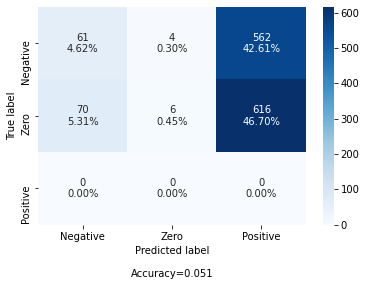

In [62]:
validation(hkex_news_df)

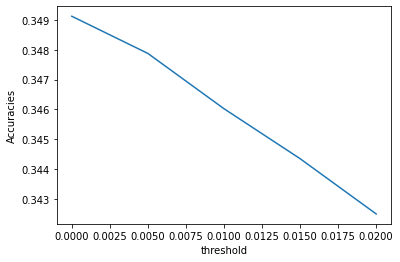

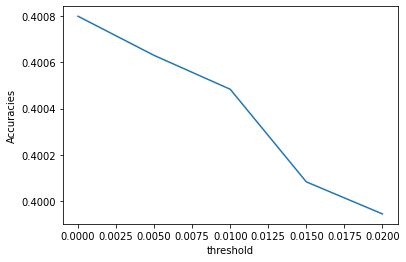

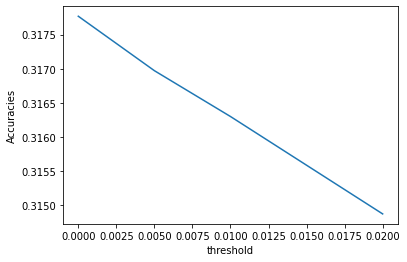

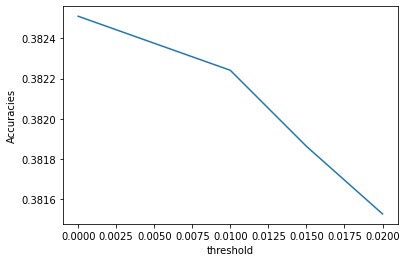

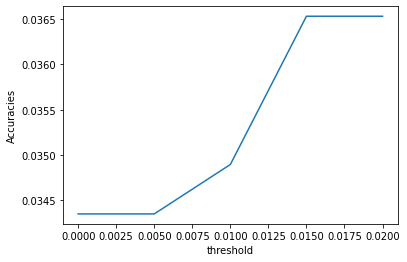

In [60]:
plot_accuracy(nasdaq_tweets_accuracies)
plot_accuracy(nasdaq_news_accuracies)
plot_accuracy(nyse_tweets_accuracies)
plot_accuracy(nyse_newss_accuracies)
plot_accuracy(hk_accuracies)